# MLP Classification code along

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

print(f"Any nans? {np.isnan(X).any()}")
X.shape, y.shape

Any nans? False


((569, 30), (569,))

## Train test split

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## MLP network

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name= "Input_Layer"))
    model.add(Dense(32, name = "Hidden1", activation = "relu")) ## Change to he initializer
    model.add(Dense(32, name = "Hidden2", activation = "relu"))
    model.add(Dense(1, name = "Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

print(f"Training parameters {(30+1) * 32+(33*32)+33}")
model = MLP()
model.summary()

Training parameters 2081
Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(scaled_X_train, y_train, epochs = 500, validation_split=.2, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 0.5978 - val_loss: 0.4716
Epoch 2/500
12/12 [==============================] - 0s 5ms/step - loss: 0.4194 - val_loss: 0.3521
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.3153 - val_loss: 0.2765
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 0.2459 - val_loss: 0.2251
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1971 - val_loss: 0.1906
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.1608 - val_loss: 0.1699
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1352 - val_loss: 0.1541
Epoch 8/500
12/12 [==============================] - 0s 5ms/step - loss: 0.1157 - val_loss: 0.1428
Epoch 9/500
12/12 [==============================] - 0s 6ms/step - loss: 0.1023 - val_loss: 0.1336
Epoch 10/500
12/12 [==============================] - 0s 5ms/step - loss: 0.0910 - val_loss: 0.1275
Epoch 11

In [25]:
import pandas as pd

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.597777,0.471621
1,0.419385,0.352064
2,0.315332,0.276482
3,0.245923,0.225104
4,0.197143,0.190614


<AxesSubplot:>

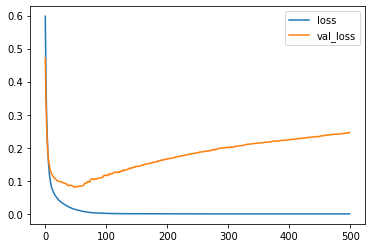

In [26]:
df_loss.plot()
## Clear overfittiing as validation loss increases after a certain amount of loss

## Early stopping

In [28]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(scaled_X_train, y_train, epochs = 50, validation_split=.2, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 15ms/step - loss: 0.8005 - val_loss: 0.6603
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.6068 - val_loss: 0.5212
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4749 - val_loss: 0.4112
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.3651 - val_loss: 0.3176
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2766 - val_loss: 0.2479
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2092 - val_loss: 0.2004
Epoch 7/50
12/12 [==============================] - 0s 6ms/step - loss: 0.1642 - val_loss: 0.1704
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1337 - val_loss: 0.1512
Epoch 9/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1128 - val_loss: 0.1386
Epoch 10/50
12/12 [==============================] - 0s 5ms/step - loss: 0.0977 - val_loss: 0.1303
Epoch 11/50
12/12 

In [30]:
df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.800526,0.660277
1,0.606834,0.521208
2,0.474905,0.411246
3,0.365070,0.317622
4,0.276568,0.247922


<AxesSubplot:>

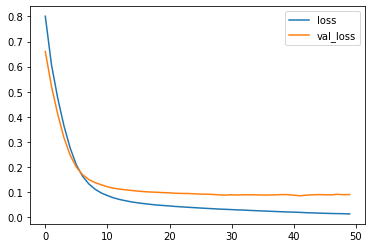

In [31]:
df_loss.plot()

In [32]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs = 50, verbose=0)

## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



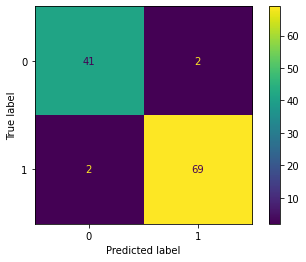

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > 0.5)*1

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))